<a href="https://colab.research.google.com/github/Wersob/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [ ]:
titanic_df = pd.read_csv('train.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic_df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nulls_summary = pd.DataFrame(titanic_df.isnull().any(), columns=["Nulls"])

In [ ]:
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(titanic_df.isnull().sum())

In [ ]:
nulls_summary['Num_of_nulls [%]'] = round((titanic_df.isnull().mean()*100), 2)

In [ ]:
print(nulls_summary)

             Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
PassengerId  False                   0              0.00
Survived     False                   0              0.00
Pclass       False                   0              0.00
Name         False                   0              0.00
Sex          False                   0              0.00
Age           True                 177             19.87
SibSp        False                   0              0.00
Parch        False                   0              0.00
Ticket       False                   0              0.00
Fare         False                   0              0.00
Cabin         True                 687             77.10
Embarked      True                   2              0.22


In [ ]:
titanic_df.skew()

<ipython-input-23-40ffe5f95c5a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,6.428074e+02,4070.917079,1437.109,NaN,7.228740e+02,5.430353e+02,9.045873e+02
1,2.607083e-140,0.000000,0.000,NaN,1.071262e-157,1.206110e-118,3.727091e-197


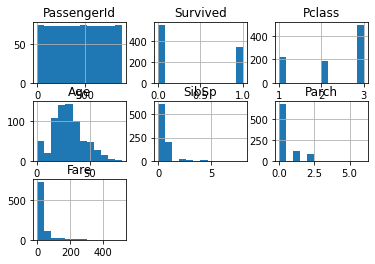

In [ ]:
titanic_df.hist(bins=12)
from scipy import stats
titanic_df.select_dtypes([float, int]).apply(stats.normaltest)

In [ ]:
survived_df = titanic_df[ titanic_df['Survived'] == 1]
no_survived_df = titanic_df[titanic_df ['Survived'] == 0]

In [ ]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
no_survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
print("Total = ", len(titanic_df))
print("Number of passengers who survived - ", len(survived_df))
print("Percentage survived - ", (len(survived_df) / len(titanic_df)) * 100.0, "%" )

Total =  891
Number of passengers who survived -  342
Percentage survived -  38.38383838383838 %


In [ ]:
print("Number of passengers who did not survived - ", len(no_survived_df))
print("Percentage who did not survived - ", (len(no_survived_df) / len(titanic_df)) * 100.0, "%" )

Number of passengers who did not survived -  549
Percentage who did not survived -  61.61616161616161 %


<AxesSubplot:xlabel='Pclass', ylabel='count'>

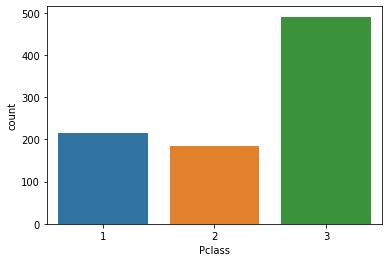

In [ ]:
sns.countplot( x = "Pclass", data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

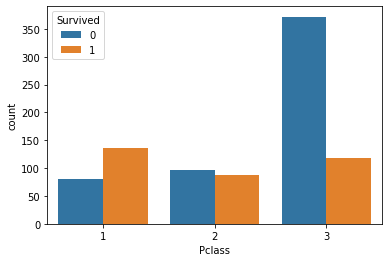

In [ ]:
 sns.countplot( x = "Pclass", hue = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

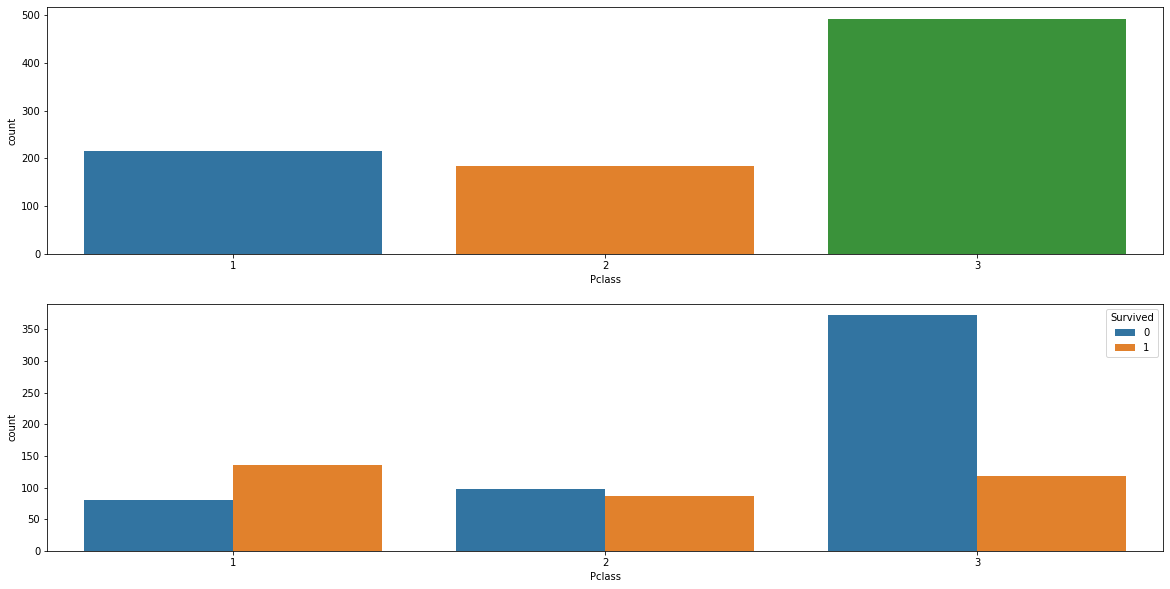

In [ ]:
plt.figure(figsize = [20, 10])
plt.subplot(211)
sns.countplot( x = "Pclass", data = titanic_df)

plt.subplot(212)
sns.countplot( x = "Pclass", hue = 'Survived', data = titanic_df)